## Random Splitting

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[0.07927446 0.91132213 0.11011579 ... 0.20308211 0.40757345 0.27615531]


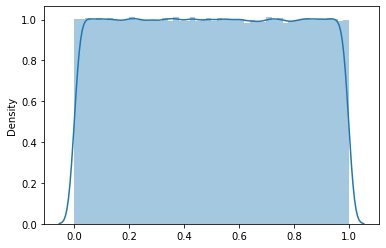

In [ ]:
import random
import seaborn as sns
import numpy as np

r = np.random.rand(1000000)
ax = sns.distplot(r)
print(r)


## Permutation testing

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


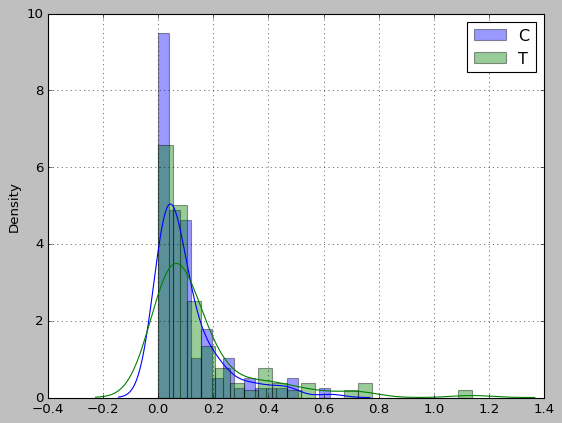

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


m_obs:0.020683531496105356
p-value:0.0873


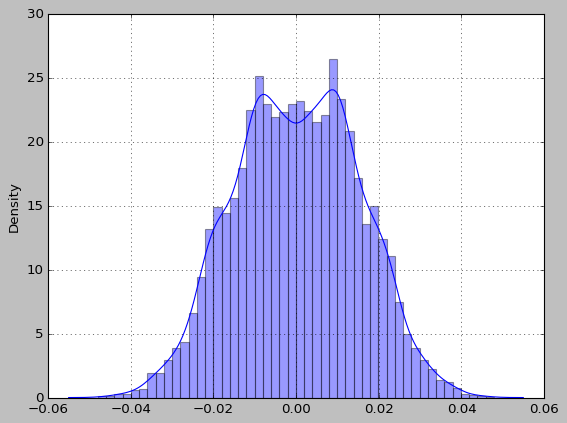

In [ ]:
# Two sets of observations: Watch time in Control and Treatment
# Again, let us use synthetic data as we dont have Netflix Data

# Time spent would be right-skewed and pareto (educated guess)
# Refer: https://en.wikipedia.org/wiki/Pareto_distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

n=100 ; # sample sizes
m=100;
k=10000; # resamplings

np.random.seed(100)

# observed samples [simulated in this case]
XC = np.random.pareto(a=10.0,size=n)
XT = np.random.pareto(a=9.0,size=m)

# observed value of m_XT - m_XC 
m_obs =  (np.percentile(XT,50) - np.percentile(XC,50))


plt.style.use('classic')
sns.distplot(XC,label="C")
sns.distplot(XT, label="T")
plt.grid()
plt.legend()
plt.show()


# Now, from the way we generated the data, we know that XC and XT populations are slightly differnt 




# Test-Statistic = (M_XT - M_XC)
# M_XT : Median of XT.
# M_XC : Median of XC


# H0: XC and XT are the same


P = np.concatenate((XC,XT)) # tuple of arrays as param. Common mistake

testStats = np.zeros(k)

for i in range(k):
  # resampling: split P into two random halves and tag hald as men and the rest as women.
  # Refer: https://stackoverflow.com/questions/3674409/how-to-split-partition-a-dataset-into-training-and-test-datasets-for-e-g-cros
  np.random.shuffle(P)
  tmp_xc, tmp_xt = P[:n], P[m:]

  # Compute test-statistic
  testStats[i] = (np.percentile(tmp_xt,50) - np.percentile(tmp_xc,50))

#CDF of testStats
#kwargs = {'cumulative': True}
#sns.distplot(testStats, hist_kws=kwargs, kde_kws=kwargs, )
sns.distplot(testStats)
plt.grid()
plt.show



# Hypothesis testing: P(testStat > Obs | H0 ) can be estimated from testStats.

m_obs =  (np.percentile(XT,50) - np.percentile(XC,50))
print("m_obs:" + str(m_obs))

num_h0 = np.sum(testStats >=  m_obs)
prob = num_h0/k
print("p-value:" + str(prob))

# if Prob(testStat >= Obs | H0) < 0.05 
# then, it is very unlikely to observe the observed-difference and hence we reject H0
# else we accept H0

## Mann Whitney U

In [ ]:

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
import scipy.stats 


n=100; # sample sizes
m=100;


np.random.seed(100)

# observed samples [simulated in this case]
XC = np.random.pareto(a=10.0,size=n)
XT = np.random.pareto(a=9.0,size=m)

U1, p = scipy.stats.mannwhitneyu(XC, XT)

print(p)


0.03875260895748919
